In [2]:
import os
import pandas as pd
import numpy as np
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
base_path = "/home/alex/PSLproj1/"
data_fn = "winemag-data-130k-v2.csv"
data_fp = os.path.join(base_path, data_fn)

data_df = pd.read_csv(data_fp)
data_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
samp_df = data_df.iloc[0:10,].copy()
samp_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [5]:
samp_df['description_len'] = samp_df['description'].apply(lambda x: len(x))
samp_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_len
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,172
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,227
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,186
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,199
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,249
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,261
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,181
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,122
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,156
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,160


In [6]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    #print(score['compound'])
    #print("{:-<40} {}".format(sentence, str(score)))
    return(score['compound'])

print(samp_df.description[7])
sentiment_analyzer_scores(samp_df.description[7])

This dry and restrained wine offers spice in profusion. Balanced with acidity and a firm texture, it's very much for food.


0.0

In [7]:
samp_df['sentiment_score'] = samp_df['description'].apply(lambda x: sentiment_analyzer_scores(x))
samp_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_len,sentiment_score
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,172,0.1531
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,227,0.6486
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,186,-0.1280
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,199,0.3400
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,249,0.8176
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,261,0.1655
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,181,0.6369
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,122,0.0000
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,156,0.9091
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,160,0.7506


In [8]:
def concatloc(row, regioncols, statecol, countrycol):
    str_concat = ""
    for c in regioncols:
        if row[c] not in ['None', np.nan, ""]:
            str_concat = str_concat + " " + str(row[c])
    str_concat = str_concat + "_ "
    if row[statecol] not in ['None', np.nan, ""]:
        str_concat = str_concat + row[statecol]
    str_concat = str_concat + ", "
    if row[countrycol] not in ['None', np.nan, ""]:
        str_concat = str_concat + row[countrycol]
    return(str_concat)

rowx = data_df.iloc[1201,]
print(rowx)
locx = concatloc(rowx, [8, 7], 6, 1)
locx

#samp_df['region_country'] = 

Unnamed: 0                                                            1201
country                                                             France
description              Fresh, crisp and fruity, this is an immediatel...
designation                                                            NaN
points                                                                  87
price                                                                   32
province                                                          Burgundy
region_1                                                    Pouilly-Fuissé
region_2                                                               NaN
taster_name                                                     Roger Voss
taster_twitter_handle                                           @vossroger
title                            Bouchard Père & Fils 2014  Pouilly-Fuissé
variety                                                         Chardonnay
winery                   

' Pouilly-Fuissé_ Burgundy, France'

In [9]:
data_df['region_country'] = data_df.apply(concatloc, axis=1, regioncols=[8,7], statecol=6, countrycol=1)
print(data_df.shape)
data_df.head()

(129971, 15)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region_country
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"Etna_ Sicily & Sardinia, Italy"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"_ Douro, Portugal"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"Willamette Valley Willamette Valley_ Oregon, US"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"Lake Michigan Shore_ Michigan, US"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"Willamette Valley Willamette Valley_ Oregon, US"


In [10]:
datarc_df = data_df.copy()
datarc_df = data_df.drop_duplicates(['region_country'], keep='first')
print(datarc_df.shape)
out_fp = os.path.join(base_path, "datarc_df.csv")
#datarc_df.to_csv(out_fp)

(1620, 15)


In [11]:
region_country_unique = data_df['region_country'].unique()
print(len(region_country_unique))
rcu_df = pd.DataFrame(region_country_unique)
out_fp = os.path.join(base_path, "region_country.csv")
#rcu_df.to_csv(out_fp)

1620


In [12]:
data_df.head(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region_country
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"Etna_ Sicily & Sardinia, Italy"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"_ Douro, Portugal"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"Willamette Valley Willamette Valley_ Oregon, US"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"Lake Michigan Shore_ Michigan, US"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"Willamette Valley Willamette Valley_ Oregon, US"
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,"Navarra_ Northern Spain, Spain"
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,"Vittoria_ Sicily & Sardinia, Italy"
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,"Alsace_ Alsace, France"
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,"_ Rheinhessen, Germany"
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,"Alsace_ Alsace, France"


In [13]:
comp_fn = "comp.xlsx"
g_dir = "geocoded"
comp_fp = os.path.join(base_path, g_dir, comp_fn)
latlon_df = pd.read_excel(comp_fp, sheet_name="final")
latlon_df

,idx,lat,lon,region_country
0,0,37.751005,14.993435,"Etna_ Sicily & Sardinia, Italy"
1,1,41.501277,-5.512293,"_ Douro, Portugal"
2,2,44.942554,-122.933762,"Willamette Valley Willamette Valley_ Oregon, US"
3,3,42.220870,-86.369469,"Lake Michigan Shore_ Michigan, US"
4,5,42.816977,-1.641765,"Navarra_ Northern Spain, Spain"
...,...,...,...,...
1615,126987,38.440429,-122.714055,California Other Sonoma County-Santa Barbara ...
1616,129280,46.190461,7.544923,"_ NeuchÃ¢tel, Switzerland"
1617,129331,45.441466,12.315259,"Del Veneto_ Northeastern Italy, Italy"
1618,129411,45.551817,10.721468,"Bardolino Superiore_ Veneto, Italy"


In [14]:
#pd.merge(results_aio_df, decorated_df, left_on='result_url', right_on='result_url', suffixes=("","_dec"))
data_df = pd.merge(data_df, latlon_df, how='left', left_on='region_country', right_on='region_country', suffixes=("","comp"))
print(data_df.shape)
data_df.head()

(129971, 18)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region_country,idx,lat,lon
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"Etna_ Sicily & Sardinia, Italy",0.0,37.751005,14.993435
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"_ Douro, Portugal",1.0,41.501277,-5.512293
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"Lake Michigan Shore_ Michigan, US",3.0,42.220870,-86.369469
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762


In [15]:
sum(data_df.lon.isnull())
datams_df = data_df[data_df.lon.isnull()]
print(datams_df.shape)
datams_df.region_country.value_counts()
datams_fp = os.path.join(base_path, g_dir, "datams_df.csv")
#datams_df.to_csv(datams_fp, index=False)

(11910, 18)


In [16]:
print(data_df.shape)
data_df = data_df.dropna(subset=['lat', 'lon'])
print(data_df.shape)

(129971, 18)
(118061, 18)


In [17]:
datams_dfnew_fp = os.path.join(base_path, g_dir, "datams_dfnew.xlsx")
datams_dfnew = pd.read_excel(datams_dfnew_fp, sheet_nam="datams_df")
print(datams_dfnew.shape)
datams_dfnew
data_df = data_df.append(datams_dfnew)
print(data_df.shape)
data_df.head()

(11910, 18)
(129971, 18)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region_country,idx,lat,lon
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"Etna_ Sicily & Sardinia, Italy",0.0,37.751005,14.993435
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"_ Douro, Portugal",1.0,41.501277,-5.512293
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"Lake Michigan Shore_ Michigan, US",3.0,42.220870,-86.369469
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762


In [18]:
sum(data_df['lat'].isnull())

0

In [19]:
data_df['description_len'] = data_df['description'].apply(lambda x: len(x))

In [20]:
data_df['sentiment_score'] = data_df['description'].apply(lambda x: sentiment_analyzer_scores(x))
data_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region_country,idx,lat,lon,description_len,sentiment_score
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"Etna_ Sicily & Sardinia, Italy",0.0,37.751005,14.993435,172,0.1531
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"_ Douro, Portugal",1.0,41.501277,-5.512293,227,0.6486
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762,186,-0.1280
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"Lake Michigan Shore_ Michigan, US",3.0,42.220870,-86.369469,199,0.3400
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762,249,0.8176


In [21]:
fruit_fn = "fruitlist.csv"
fruit_fp = os.path.join(base_path, fruit_fn)
fruit_df = pd.read_csv(fruit_fp, header=None)
fruit_ls = list(fruit_df[0])
fruit_ls.append("fruit")
fruit_ls = [f.lower() for f in fruit_ls]
fruit_ls

['apple',
 'apricot',
 'banana',
 'bilberry',
 'blackberry',
 'blackcurrant',
 'blueberry',
 'boysenberry',
 'currant',
 'cherry',
 'cherimoya',
 'cloudberry',
 'coconut',
 'cranberry',
 'damson',
 'date',
 'dragonfruit',
 'durian',
 'elderberry',
 'feijoa',
 'fig',
 'goji',
 'gooseberry',
 'grape',
 'raisin',
 'grapefruit',
 'guava',
 'honeyberry',
 'huckleberry',
 'jabuticaba',
 'jackfruit',
 'jambul',
 'jostaberry',
 'jujube',
 'juniper',
 'kiwano',
 'kiwifruit',
 'kumquat',
 'lemon',
 'lime',
 'loganberry',
 'loquat',
 'longan',
 'lychee',
 'mango',
 'mangosteen',
 'marionberry',
 'cantaloupe',
 'honeydew',
 'watermelon',
 'miracle fruit',
 'mulberry',
 'nectarine',
 'nance',
 'orange',
 'clementine',
 'mandarin',
 'tangerine',
 'papaya',
 'passionfruit',
 'peach',
 'pear',
 'persimmon',
 'plantain',
 'plum',
 'pineapple',
 'pineberry',
 'plumcot',
 'pluot',
 'pomegranate',
 'pomelo',
 'quince',
 'raspberry',
 'salmonberry',
 'rambutan',
 'redcurrant',
 'salal',
 'salak',
 'satsuma

In [22]:
def has_fruit(text):
    #print(text)
    t_lower = text.lower()
    text_words_ls = t_lower.split()
    #print(text_words_ls)
    #print(fruit_ls)
    fruity = False
    i = 0
    while i < len(text_words_ls):
        text_word = text_words_ls[i]
        text_word = text_word.translate(str.maketrans('', '', string.punctuation))
        #text_word.translate(None, string.punctuation)
        #print(text_word)
        if text_word in fruit_ls:
            fruity = True
            #print(text_word)
            break                 
        i += 1
        #print(i)
    return(fruity)

#print(data_df.columns)
dstxn1 = data_df['description'].iloc[100]
#print(data_df.head(1))
print(dstxn1)
isfruity = has_fruit(dstxn1)
print(dstxn1)
isfruity
        
    

Made with 65% Sangiovese, 20% Merlot and 15% Cabernet Sauvignon, this has subtle aromas of black-skinned fruit and thyme. The easygoing palate delivers black cherry and cinnamon alongside smooth tannins.
Made with 65% Sangiovese, 20% Merlot and 15% Cabernet Sauvignon, this has subtle aromas of black-skinned fruit and thyme. The easygoing palate delivers black cherry and cinnamon alongside smooth tannins.


True

In [23]:
data_df["fruity"] = data_df["description"].apply(lambda x: has_fruit(x))
data_df.head(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,title,variety,winery,region_country,idx,lat,lon,description_len,sentiment_score,fruity
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"Etna_ Sicily & Sardinia, Italy",0.0,37.751005,14.993435,172,0.1531,True
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"_ Douro, Portugal",1.0,41.501277,-5.512293,227,0.6486,False
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762,186,-0.1280,True
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"Lake Michigan Shore_ Michigan, US",3.0,42.220870,-86.369469,199,0.3400,True
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762,249,0.8176,False
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,...,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,"Navarra_ Northern Spain, Spain",5.0,42.816977,-1.641765,261,0.1655,True
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,...,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,"Vittoria_ Sicily & Sardinia, Italy",6.0,36.952100,14.537265,181,0.6369,False
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,...,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,"Alsace_ Alsace, France",7.0,48.318179,7.441624,122,0.0000,False
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,...,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,"_ Rheinhessen, Germany",8.0,49.893533,8.085030,156,0.9091,True
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,...,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,"Alsace_ Alsace, France",7.0,48.318179,7.441624,160,0.7506,True


In [24]:
def get_year(ttl):
    token_ls = ttl.split()
    j = 0
    year = None
    while j < len(token_ls):
        tk = token_ls[j]
        #print(tk)
        if tk.isdigit():
            year = np.int(tk)
            break                 
        j += 1
    return(year)

yr_val = get_year(data_df['title'].iloc[8000])
yr_val
    

2012

In [25]:
data_df['year'] = data_df['title'].apply(lambda y: get_year(y))
data_df.head(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,variety,winery,region_country,idx,lat,lon,description_len,sentiment_score,fruity,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,White Blend,Nicosia,"Etna_ Sicily & Sardinia, Italy",0.0,37.751005,14.993435,172,0.1531,True,2013.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,Portuguese Red,Quinta dos Avidagos,"_ Douro, Portugal",1.0,41.501277,-5.512293,227,0.6486,False,2011.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Pinot Gris,Rainstorm,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762,186,-0.1280,True,2013.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,Riesling,St. Julian,"Lake Michigan Shore_ Michigan, US",3.0,42.220870,-86.369469,199,0.3400,True,2013.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Pinot Noir,Sweet Cheeks,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762,249,0.8176,False,2012.0
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,...,Tempranillo-Merlot,Tandem,"Navarra_ Northern Spain, Spain",5.0,42.816977,-1.641765,261,0.1655,True,2011.0
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,...,Frappato,Terre di Giurfo,"Vittoria_ Sicily & Sardinia, Italy",6.0,36.952100,14.537265,181,0.6369,False,2013.0
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,...,Gewürztraminer,Trimbach,"Alsace_ Alsace, France",7.0,48.318179,7.441624,122,0.0000,False,2012.0
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,...,Gewürztraminer,Heinz Eifel,"_ Rheinhessen, Germany",8.0,49.893533,8.085030,156,0.9091,True,2013.0
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,...,Pinot Gris,Jean-Baptiste Adam,"Alsace_ Alsace, France",7.0,48.318179,7.441624,160,0.7506,True,2012.0


In [26]:
sum(data_df.year.isnull())

4389

In [27]:
print(data_df.variety.value_counts()[0:50])

Pinot Noir                       13272
Chardonnay                       11753
Cabernet Sauvignon                9472
Red Blend                         8946
Bordeaux-style Red Blend          6915
Riesling                          5189
Sauvignon Blanc                   4967
Syrah                             4142
Merlot                            3102
Nebbiolo                          2804
Zinfandel                         2714
Sangiovese                        2707
Malbec                            2652
Portuguese Red                    2466
White Blend                       2360
Sparkling Blend                   2153
Rosé                              2114
Tempranillo                       1810
Pinot Gris                        1455
RosÃ©                             1450
Champagne Blend                   1396
Cabernet Franc                    1353
Portuguese White                  1159
Bordeaux-style White Blend        1066
Pinot Grigio                      1052
Grüner Veltliner         

(129971, 22)


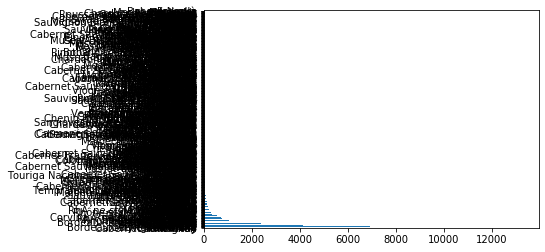

In [28]:
print(data_df.shape)
data_df.variety.value_counts().plot(kind='barh')


                      variety  count
0                  Pinot Noir  13272
1                  Chardonnay  11753
2          Cabernet Sauvignon   9472
3                   Red Blend   8946
4    Bordeaux-style Red Blend   6915
..                        ...    ...
726                  Molinara      1
727                 Karasakiz      1
728           Merlot-Grenache      1
729                  Forcallà      1
730              Babosa Negro      1

[731 rows x 2 columns]


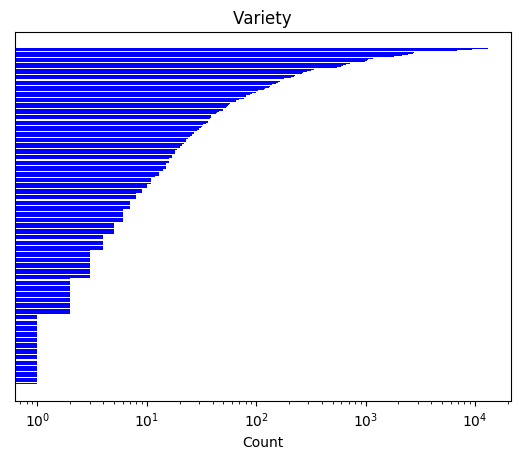

In [29]:
v_vc = pd.DataFrame(data_df.variety.value_counts())
v_vc = v_vc.reset_index()
v_vc.columns = ['variety', 'count']
print(v_vc)
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(v_vc['variety'], v_vc['count'], color='blue')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_xscale('log')
ax.set_title('Variety')
ax.get_yaxis().set_visible(False)

plt.show()

In [30]:
total_count = sum(v_vc['count'])
total_count
num_rows = data_df.shape[0]
num_rows
v_vc.sort_values(inplace=True, by='count', ascending=False)
v_vc = v_vc[0:50]
v_vc
#v_vc['cumsum'] = v_vc['count'].cumsum()
#cutoff = 0.05*num_rows
#cutoff
#v_vc_other = list(v_vc[v_vc['cumsum']<cutoff].variety)
#v_vc_other
variety_top_ls = list(v_vc['variety'])
#variety_top_ls = list(variety_top)
#print(len(variety_top_ls))
variety_top_ls


['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Merlot',
 'Nebbiolo',
 'Zinfandel',
 'Sangiovese',
 'Malbec',
 'Portuguese Red',
 'White Blend',
 'Sparkling Blend',
 'Rosé',
 'Tempranillo',
 'Pinot Gris',
 'RosÃ©',
 'Champagne Blend',
 'Cabernet Franc',
 'Portuguese White',
 'Bordeaux-style White Blend',
 'Pinot Grigio',
 'Grüner Veltliner',
 'Gamay',
 'Gewürztraminer',
 'Viognier',
 'Rhône-style Red Blend',
 'Shiraz',
 'Petite Sirah',
 'Sangiovese Grosso',
 'Barbera',
 'Glera',
 'Port',
 'Grenache',
 'Corvina, Rondinella, Molinara',
 'RhÃ´ne-style Red Blend',
 'Chenin Blanc',
 'Tempranillo Blend',
 'Carmenère',
 'Pinot Blanc',
 "Nero d'Avola",
 'Aglianico',
 'Moscato',
 'AlbariÃ±o',
 'Garnacha',
 'Sauvignon',
 'GrÃ¼ner Veltliner']

In [31]:
def set_other_cat(ntry, non_other_ls):
    if ntry in non_other_ls:
        return ntry
    else:
        return "other"
    
data_df['varietyB'] = data_df['variety'].apply(set_other_cat, non_other_ls=variety_top_ls)

print(data_df['varietyB'].value_counts()[:20])
data_df.head()

other                       15706
Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Merlot                       3102
Nebbiolo                     2804
Zinfandel                    2714
Sangiovese                   2707
Malbec                       2652
Portuguese Red               2466
White Blend                  2360
Sparkling Blend              2153
Rosé                         2114
Tempranillo                  1810
Pinot Gris                   1455
Name: varietyB, dtype: int64


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,winery,region_country,idx,lat,lon,description_len,sentiment_score,fruity,year,varietyB
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,Nicosia,"Etna_ Sicily & Sardinia, Italy",0.0,37.751005,14.993435,172,0.1531,True,2013.0,White Blend
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,Quinta dos Avidagos,"_ Douro, Portugal",1.0,41.501277,-5.512293,227,0.6486,False,2011.0,Portuguese Red
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Rainstorm,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762,186,-0.1280,True,2013.0,Pinot Gris
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,St. Julian,"Lake Michigan Shore_ Michigan, US",3.0,42.220870,-86.369469,199,0.3400,True,2013.0,Riesling
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Sweet Cheeks,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762,249,0.8176,False,2012.0,Pinot Noir


In [32]:
tn_vc = data_df.taster_name.value_counts()
tn_vc

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10757
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       2937
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Anne KrebiehlÂ MW       748
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Kerin Oâ€™Keefe          19
Christina Pickard         6
Name: taster_name, dtype: int64

26244
           taster_name  count
0           Roger Voss  25514
1    Michael Schachner  15134
2        Kerin O’Keefe  10757
3       Virginie Boone   9537
4         Paul Gregutt   9532
5        Matt Kettmann   6332
6       Joe Czerwinski   5147
7     Sean P. Sullivan   4966
8   Anna Lee C. Iijima   4415
9           Jim Gordon   4177
10    Anne Krebiehl MW   2937
11       Lauren Buzzeo   1835
12     Susan Kostrzewa   1085
13   Anne KrebiehlÂ MW    748
14       Mike DeSimone    514
15        Jeff Jenssen    491
16  Alexander Peartree    415
17        Carrie Dykes    139
18         Fiona Adams     27
19     Kerin Oâ€™Keefe     19
20   Christina Pickard      6


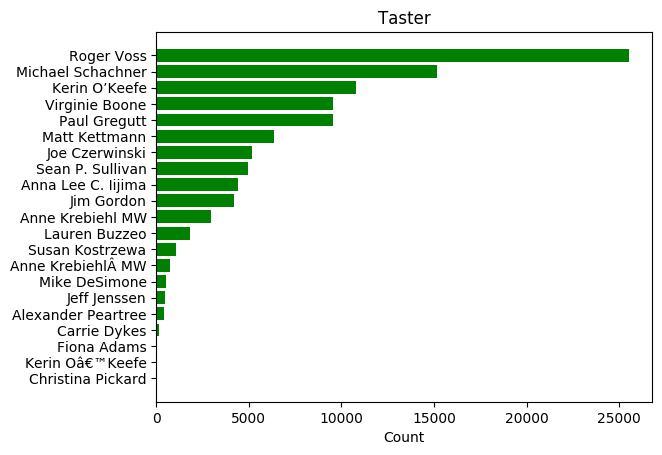

In [33]:
print(sum(data_df.taster_name.isnull()))
tn_vc = pd.DataFrame(data_df.taster_name.value_counts())
tn_vc = tn_vc.reset_index()
tn_vc.columns = ['taster_name', 'count']
print(tn_vc)
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(tn_vc['taster_name'], tn_vc['count'], color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Taster')

plt.show()

In [34]:
tn_vc.sort_values(inplace=True, by='count', ascending=True)
tn_vc['cumsum'] = tn_vc['count'].cumsum()
cutoff = 0.05*num_rows
cutoff
#tn_vc_other = list(tn_vc[tn_vc['cumsum']<cutoff].taster_name)
#tn_vc_other
taster_name_top = set(tn_vc.taster_name)
taster_name_top_ls = list(taster_name_top)
print(len(taster_name_top_ls))
taster_name_top_ls


21


['Anne KrebiehlÂ\xa0MW',
 'Matt Kettmann',
 'Joe Czerwinski',
 'Alexander Peartree',
 'Carrie Dykes',
 'Lauren Buzzeo',
 'Kerin Oâ€™Keefe',
 'Susan Kostrzewa',
 'Mike DeSimone',
 'Jim Gordon',
 'Kerin O’Keefe',
 'Michael Schachner',
 'Fiona Adams',
 'Anne Krebiehl\xa0MW',
 'Virginie Boone',
 'Paul Gregutt',
 'Jeff Jenssen',
 'Christina Pickard',
 'Sean P. Sullivan',
 'Anna Lee C. Iijima',
 'Roger Voss']

In [35]:
data_df['taster_nameB'] = data_df['taster_name'].apply(set_other_cat, non_other_ls=taster_name_top_ls)

print(data_df['taster_nameB'].value_counts())
data_df.head()

other                 26244
Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10757
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       2937
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Anne KrebiehlÂ MW       748
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Kerin Oâ€™Keefe          19
Christina Pickard         6
Name: taster_nameB, dtype: int64


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,region_country,idx,lat,lon,description_len,sentiment_score,fruity,year,varietyB,taster_nameB
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,"Etna_ Sicily & Sardinia, Italy",0.0,37.751005,14.993435,172,0.1531,True,2013.0,White Blend,Kerin O’Keefe
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,"_ Douro, Portugal",1.0,41.501277,-5.512293,227,0.6486,False,2011.0,Portuguese Red,Roger Voss
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762,186,-0.1280,True,2013.0,Pinot Gris,Paul Gregutt
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,"Lake Michigan Shore_ Michigan, US",3.0,42.220870,-86.369469,199,0.3400,True,2013.0,Riesling,Alexander Peartree
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,"Willamette Valley Willamette Valley_ Oregon, US",2.0,44.942554,-122.933762,249,0.8176,False,2012.0,Pinot Noir,Paul Gregutt


In [36]:
df_cols = data_df.columns
print(df_cols)
keep_ls = ['points', 'price', 'lat', 'lon', 
           'description_len', 'sentiment_score', 'fruity',
           'year', 'winery','varietyB', 'taster_nameB'] 
datanew_df = data_df.copy()
datanew_df = datanew_df[keep_ls]
print(datanew_df.shape)
datanew_df.head()

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery', 'region_country',
       'idx', 'lat', 'lon', 'description_len', 'sentiment_score', 'fruity',
       'year', 'varietyB', 'taster_nameB'],
      dtype='object')
(129971, 11)


,points,price,lat,lon,description_len,sentiment_score,fruity,year,winery,varietyB,taster_nameB
0,87,NaN,37.751005,14.993435,172,0.1531,True,2013.0,Nicosia,White Blend,Kerin O’Keefe
1,87,15.0,41.501277,-5.512293,227,0.6486,False,2011.0,Quinta dos Avidagos,Portuguese Red,Roger Voss
2,87,14.0,44.942554,-122.933762,186,-0.1280,True,2013.0,Rainstorm,Pinot Gris,Paul Gregutt
3,87,13.0,42.220870,-86.369469,199,0.3400,True,2013.0,St. Julian,Riesling,Alexander Peartree
4,87,65.0,44.942554,-122.933762,249,0.8176,False,2012.0,Sweet Cheeks,Pinot Noir,Paul Gregutt


In [37]:
datanew_df_fn = "data_new.csv"
datanew_df_fp = os.path.join(base_path, datanew_df_fn)
#datanew_df.to_csv(datanew_df_fp, index=False)

In [40]:
datanew_df.points.max()

100